#### Students Name

In [31]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Loading Data

Feature Description
price in US dollars ( 326−−
 18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

table width of the top of the diamond relative to widest point (43--95)

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

In [3]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 11)

# Data Processing
Steps involved in Data Preprocessing

Data cleaning
Identifying and removing outliers
Encoding categorical variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
#The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [8]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


# Exploratory Data Analysis

<AxesSubplot: xlabel='color', ylabel='price'>

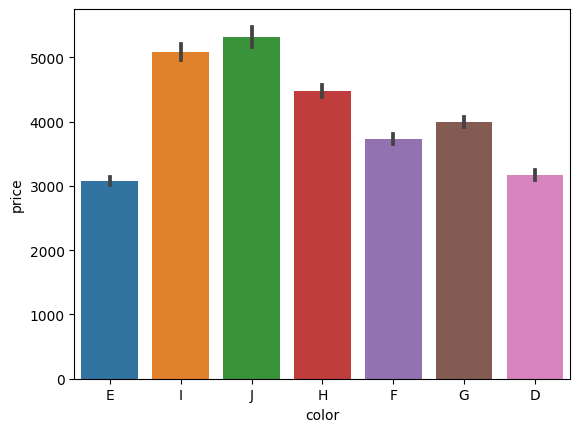

In [35]:
sns.barplot(data=data,x=data['color'],y=data['price'])

<AxesSubplot: xlabel='carat', ylabel='price'>

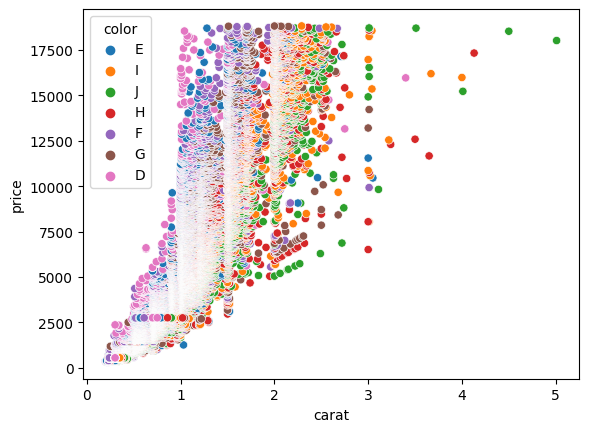

In [18]:
sns.scatterplot(data=data,x='carat',y='price',hue='color')

In [19]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<AxesSubplot: xlabel='clarity', ylabel='price'>

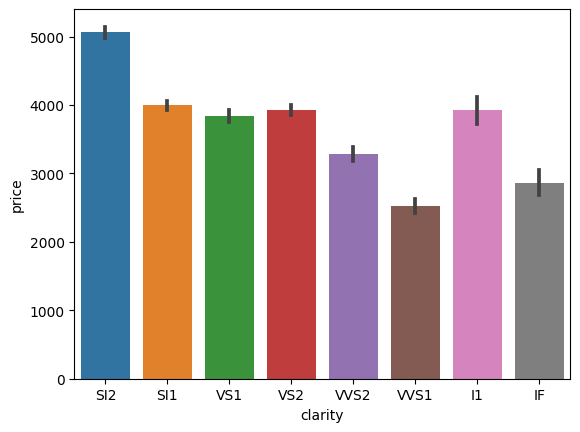

In [21]:
sns.barplot(data=data,x=data['clarity'],y=data['price'])

In [22]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<AxesSubplot: xlabel='carat', ylabel='price'>

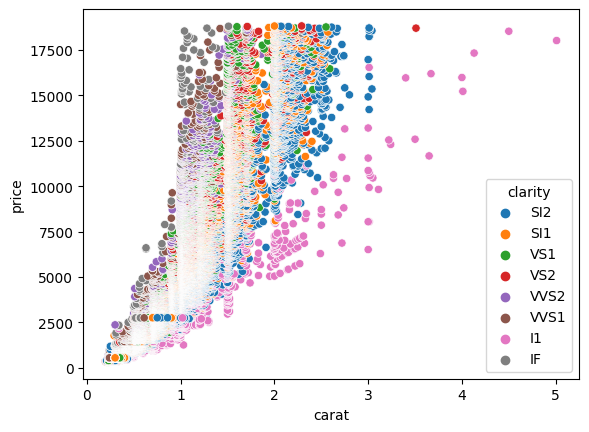

In [23]:
sns.scatterplot(data=data,x='carat',y='price',hue='clarity')

### Lets check check the correlation 

In [32]:
# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [33]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot: >

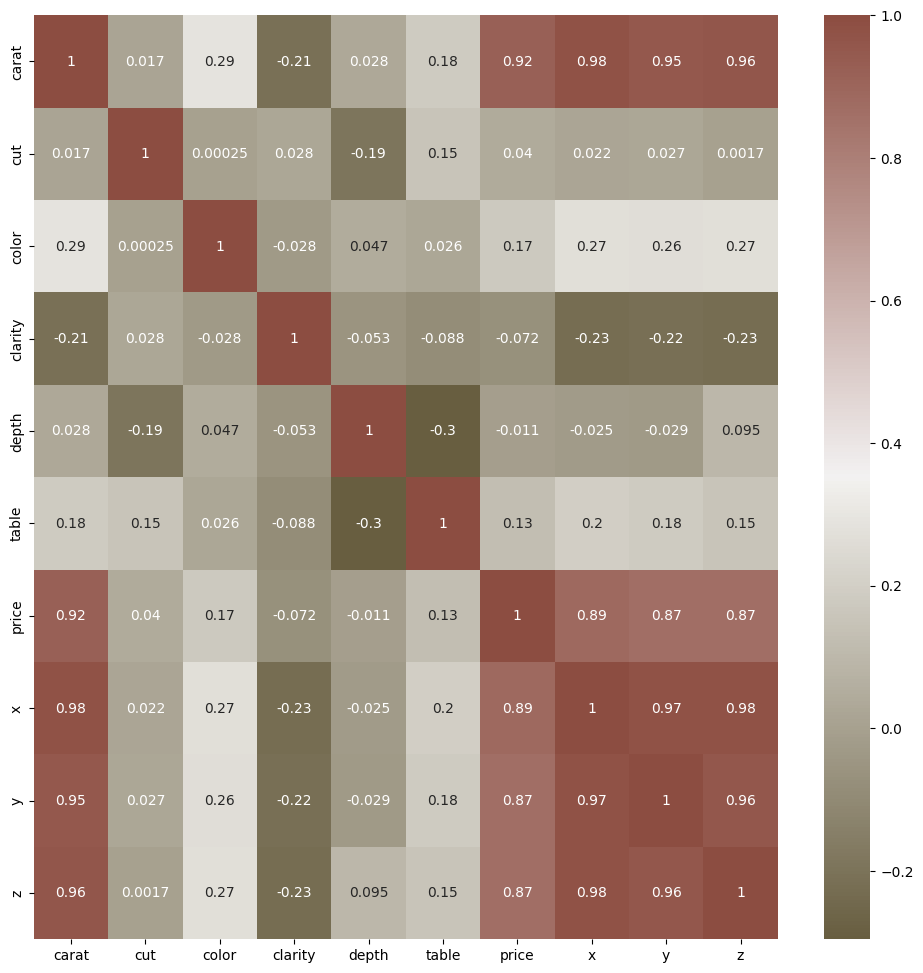

In [34]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

# Final Conclusions

Based on the heat graph, the price of a diamonds is highly dependent on the carat based on the high correlation value.

Based on the research questions of this study,
1. Does the degree of clarity of the diamonds (how clean it is) increase the longevity of diamond prices.
H0- Expectancy increases for diamond prices for the different grades of diamond clarity.

I decided to prove the null hypothesis. 
 Based on the bar and the scatter graphs, the price expectancy increases for the different grades of diamond clarity. For instance, the price of VS2 diamond is higher than that of VS1 yet VS1 has more clarity than VS2. Also, IF is considered the best in terms of clarity but SI2 is more valuable in terms of price.
 
 
2. Does the color grade of the diamonds increase the lifespan of the diamond prices 2.
H1- The expectation decreases or does not change for diamond prices for the different colors.
 The bar and scatter graph prove that the alternative hypothesis is true. The price decreases for diamond prices for the different colours. Considering that colour grade J is considered the worst yet it is the most valuable in terms of price, the expectation decreases. 